<a href="https://colab.research.google.com/github/OdysseusPolymetis/philo_num_grenoble_24/blob/main/compare_nlp_modules_latin_greek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

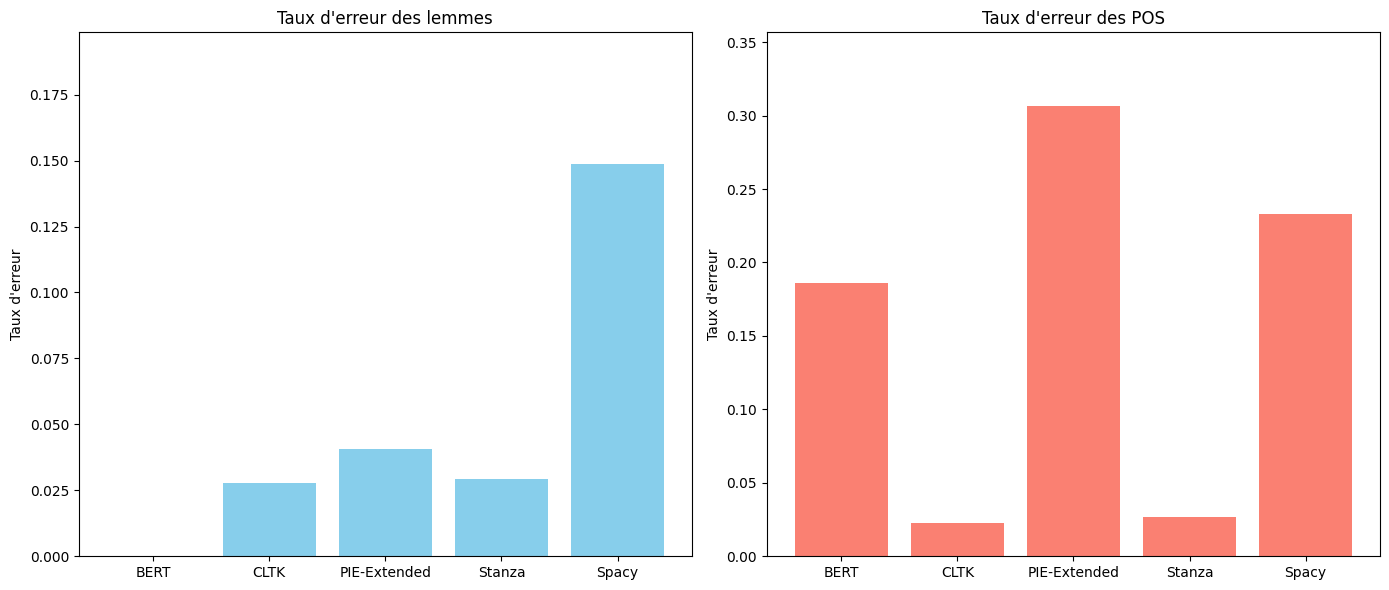

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

bert_df = pd.read_csv('/content/bert_results.csv')
cltk_df = pd.read_csv('/content/cltk_results.csv')
pie_df = pd.read_csv('/content/pie_results.csv')
stanza_df = pd.read_csv('/content/stanza_results.csv')
spacy_df = pd.read_csv('/content/spacy_results.csv')

def calculate_error_rate(df, lemma_match_column, pos_match_column):
    lemma_error_rate = 0
    if lemma_match_column in df.columns:
        lemma_errors = df[lemma_match_column].value_counts().get(False, 0)
        total_lemmas = len(df[lemma_match_column].dropna())
        lemma_error_rate = lemma_errors / total_lemmas if total_lemmas else 0

    pos_errors = df[pos_match_column].value_counts().get(False, 0)
    total_pos = len(df)
    pos_error_rate = pos_errors / total_pos if total_pos else 0

    return lemma_error_rate, pos_error_rate

bert_pos_error_rate = calculate_error_rate(bert_df, None, 'POS Match')[1]
cltk_lemma_error_rate, cltk_pos_error_rate = calculate_error_rate(cltk_df, 'Lemma Match', 'POS Match')
pie_lemma_error_rate, pie_pos_error_rate = calculate_error_rate(pie_df, 'Lemma Match', 'POS Match')
stanza_lemma_error_rate, stanza_pos_error_rate = calculate_error_rate(stanza_df, 'Lemma Match', 'POS Match')
spacy_lemma_error_rate, spacy_pos_error_rate = calculate_error_rate(spacy_df, 'Lemma Match', 'POS Match')

tools = ['BERT', 'CLTK', 'PIE-Extended', 'Stanza', 'Spacy']
lemma_error_rates = [0, cltk_lemma_error_rate, pie_lemma_error_rate, stanza_lemma_error_rate, spacy_lemma_error_rate]  # BERT n'a pas de taux pour les lemmes
pos_error_rates = [bert_pos_error_rate, cltk_pos_error_rate, pie_pos_error_rate, stanza_pos_error_rate, spacy_pos_error_rate]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(tools, lemma_error_rates, color='skyblue')
axes[0].set_title('Taux d\'erreur des lemmes')
axes[0].set_ylabel('Taux d\'erreur')
axes[0].set_ylim([0, max(lemma_error_rates) + 0.05])

axes[1].bar(tools, pos_error_rates, color='salmon')
axes[1].set_title('Taux d\'erreur des POS')
axes[1].set_ylabel('Taux d\'erreur')
axes[1].set_ylim([0, max(pos_error_rates) + 0.05])

plt.tight_layout()
plt.show()
